In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from gpnotebook.tools.standard_imports import *
from gpnotebook.tools.glycan import decide_glycan_type

In [3]:
cancers = cptac_glyco.get_cancer_info()
cancers

{'brca': 'Breast invasive carcinoma',
 'ccrcc': 'Clear cell renal cell carcinoma',
 'coad': 'Colon adenocarcinoma',
 'gbm': 'Glioblastoma multiforme',
 'hnscc': 'Head and Neck squamous cell carcinoma',
 'lscc': 'Lung squamous cell carcinoma',
 'luad': 'Lung adenocarcinoma',
 'ov': 'Ovarian serous cystadenocarcinoma',
 'pdac': 'Pancreatic ductal adenocarcinoma',
 'ucec': 'Uterine Corpus Endometrial Carcinoma'}

In [4]:
glycan_types = {}

for cancer in cancers:
    cancer_glyco = cptac_glyco.get_cancer(cancer).get_glycoproteomics()
    for index,row in cancer_glyco.iterrows():
        gene,protein,seq,site,glycan = index
        glycosite = f'{gene}@{protein}@{seq}'
        glycan_type = decide_glycan_type(glycan)
        if glycan_type in glycan_types:
            glycan_types[glycan_type].append(glycosite)
        else:
            glycan_types[glycan_type] = [glycosite]

for i in glycan_types:
    glycan_types[i] = set(glycan_types[i])


/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/brca/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ccrcc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/coad/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/gbm/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/hnscc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/lscc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/luad/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ov/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/pdac/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ucec/glycoproteomics_abundance.joblib


In [9]:
sites = []
for i in glycan_types:
    sites += glycan_types[i]
len(set(sites))

4793

In [10]:
1601/4793

0.3340287919883163

In [5]:
glycan_types_count = dict()
for i in glycan_types:
    glycan_types_count[i] = len(glycan_types[i])

In [6]:
glycan_types_count

{'F+S': 3417, 'only_S': 2948, 'Other': 2487, 'only_F': 3332, 'HM': 2987}

/Users/yingweihu/opt/anaconda3/envs/py39_glycositeatlas/lib/python3.9/site-packages/venn/_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
/Users/yingweihu/opt/anaconda3/envs/py39_glycositeatlas/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


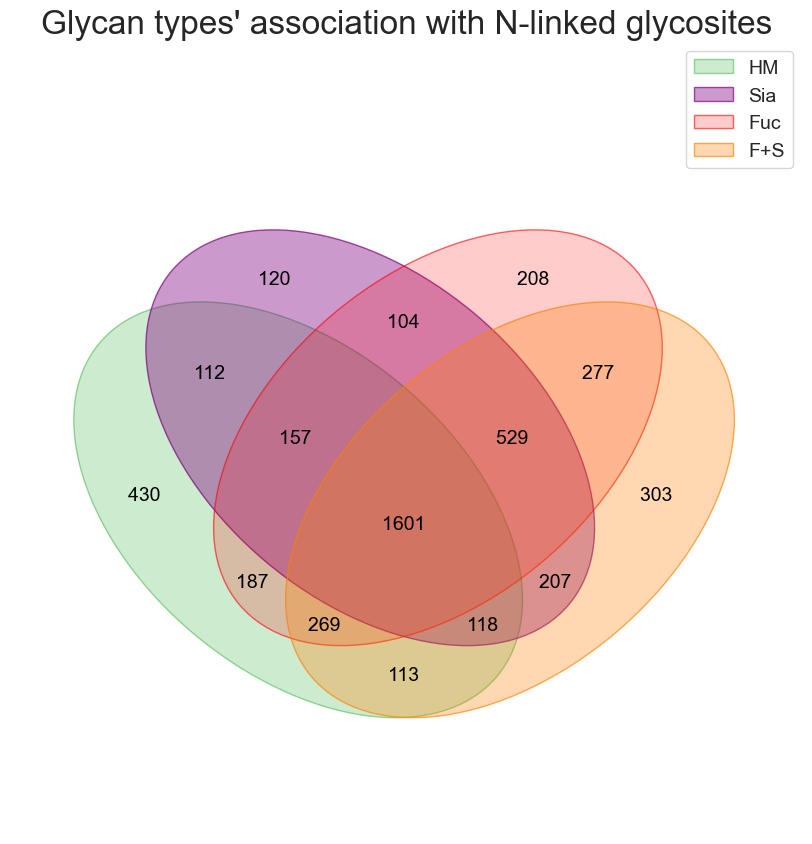

In [19]:
import venn
glycan_labels = ['HM', 'only_S', 'only_F', 'F+S']

# Define custom colors for each circle in the Venn diagram
colors = [
    [0.36, 0.75, 0.38, 0.3],  # Green with 30% transparency
    [0.5, 0.0, 0.5, 0.4],  # Purple with 40% transparency
    [1.0, 0.0, 0.0, 0.2],  # Red with 20% transparency
    [1.0, 0.5, 0.0, 0.3],  # Orange with 30% transparency

]


labels = venn.get_labels([glycan_types.get(i) for i in glycan_labels], fill=['number'])

fig, ax = venn.venn4(labels, names=['HM', 'Sia', 'Fuc', 'F+S'],colors=colors)

plt.title("Glycan types' association with N-linked glycosites",fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 